In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme()

In [29]:
df = pd.read_csv("allocations.csv")
df["Day"] = df["Day"].map(lambda x: int(x[4:]))
df.head()

,Day,Position,Candidate Id,Experience,Language Skills,Presentation Skills
0,1,Client Services Assistant,130,5,4,0
1,1,Client Services Assistant,158,5,1,5
2,1,Client Services Assistant,176,5,2,4
3,1,Client Services Assistant,210,5,2,1
4,1,Client Services Assistant,236,5,3,0


In [30]:
df.describe()

,Day,Candidate Id,Experience,Language Skills,Presentation Skills
count,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000
mean,4.904119,169.345037,4.617151,2.481431,2.532073
std,2.399942,97.489004,0.580031,1.467610,1.441828
min,1.000000,1.000000,2.000000,0.000000,0.000000
25%,3.000000,84.000000,4.000000,1.000000,1.000000
50%,5.000000,174.000000,5.000000,2.000000,3.000000
75%,7.000000,255.000000,5.000000,4.000000,4.000000
max,9.000000,330.000000,5.000000,5.000000,5.000000


In [31]:
print("Maximum total working days: ", df.groupby("Candidate Id").count().max()["Day"])

Maximum total working days:  9


In [32]:
days_array = []
for candidate in df["Candidate Id"].sort_values().unique():
    days = list(df[df["Candidate Id"] == candidate]["Day"])
    days_array.append([1 if i in days else 0 for i in range(1, 10)])

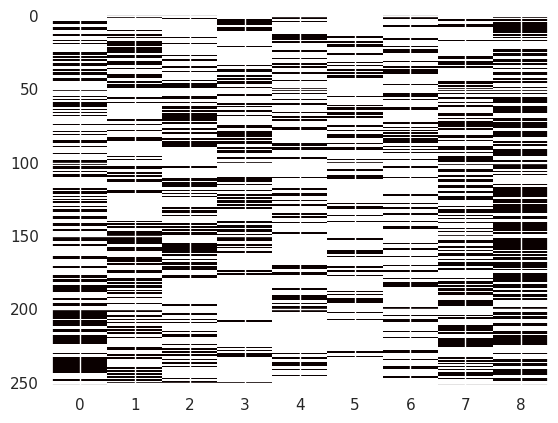

In [33]:
plt.imshow(days_array, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

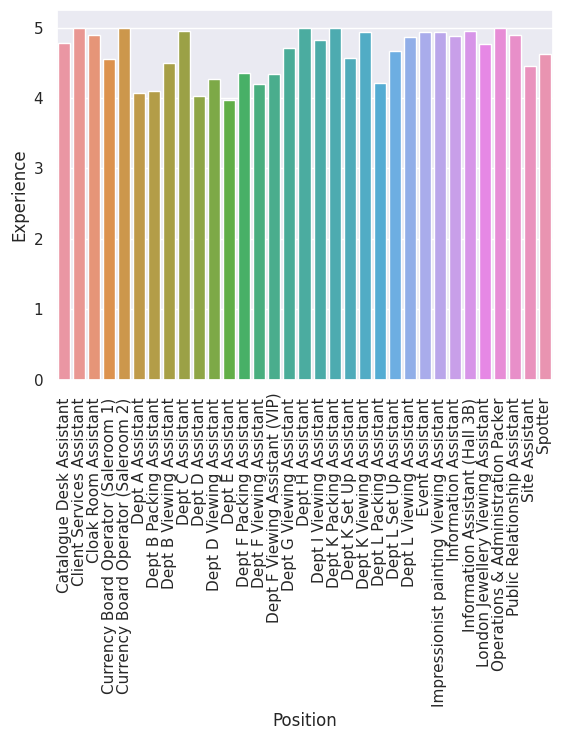

In [37]:
def show_group_by_position():
    df_grouped_by_position = df.groupby("Position").mean()
    sns.barplot(data=df_grouped_by_position, x=df_grouped_by_position.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
    
show_group_by_position()

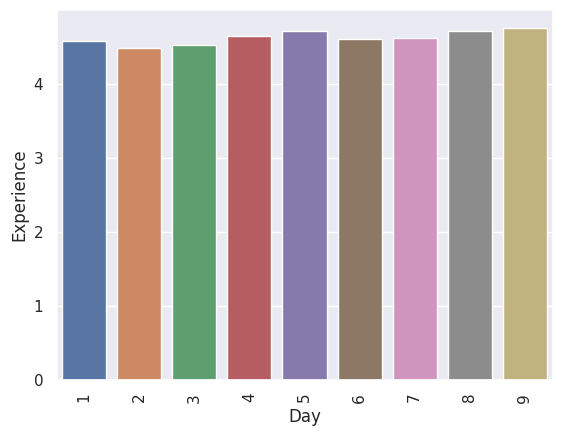

In [38]:
def show_group_by_day():
    df_grouped_by_day = df.groupby("Day").mean(numeric_only=True)
    sns.barplot(data=df_grouped_by_day, x=df_grouped_by_day.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
show_group_by_day()

In [39]:
overworked = []
for candidate in df["Candidate Id"].sort_values().unique():
    days = list(df[df["Candidate Id"] == candidate]["Day"])

    consecutive = 0
    for i in range(1, 10):
        if i in days:
            consecutive += 1
            if consecutive >= 8:
                print(candidate, days)
        else:
            consecutive = 0

14 [1, 2, 3, 4, 5, 6, 7, 8]
15 [1, 2, 3, 4, 5, 6, 7, 8, 9]
15 [1, 2, 3, 4, 5, 6, 7, 8, 9]
70 [1, 2, 3, 4, 5, 6, 7, 8, 9]
70 [1, 2, 3, 4, 5, 6, 7, 8, 9]
80 [1, 2, 3, 4, 5, 6, 7, 8]
130 [1, 2, 3, 4, 5, 6, 7, 8]
139 [1, 2, 3, 4, 5, 6, 7, 8]
188 [1, 2, 3, 4, 5, 6, 7, 8, 9]
188 [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [40]:
df.head()

,Day,Position,Candidate Id,Experience,Language Skills,Presentation Skills
0,1,Client Services Assistant,130,5,4,0
1,1,Client Services Assistant,158,5,1,5
2,1,Client Services Assistant,176,5,2,4
3,1,Client Services Assistant,210,5,2,1
4,1,Client Services Assistant,236,5,3,0


In [27]:
gantt_df = pd.DataFrame([
    dict(Candidate=candidate, Start=f"2023-06-{days}", Finish=f"2023-06-{days+1}", Position=position) for candidate, days, position in zip(df["Candidate Id"], df["Day"], df["Position"])
])

fig = px.timeline(gantt_df, x_start="Start", x_end="Finish", y="Candidate", color="Position", height=5000)
fig.show()